# Case Study - Analyse the data of quarterly shipments transfer of a certain courier company in the $20^{th}$ century.

#### Basic Libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

##  Reading the data in a quarterly Time Series Format.

In [102]:
df= pd.read_csv("ApplianceShipments.csv")
dti = pd.date_range("1985-01-01",periods=20,freq='3M')
dti

DatetimeIndex(['1985-01-31', '1985-04-30', '1985-07-31', '1985-10-31',
               '1986-01-31', '1986-04-30', '1986-07-31', '1986-10-31',
               '1987-01-31', '1987-04-30', '1987-07-31', '1987-10-31',
               '1988-01-31', '1988-04-30', '1988-07-31', '1988-10-31',
               '1989-01-31', '1989-04-30', '1989-07-31', '1989-10-31'],
              dtype='datetime64[ns]', freq='3M')

In [103]:
df['DTI'] = dti
df.set_index('DTI',inplace=True)
df.head()

,Quarter,Year,Shipments
DTI,,,
1985-01-31,Q1,1985,4009
1985-04-30,Q2,1985,4321
1985-07-31,Q3,1985,4224
1985-10-31,Q4,1985,3944
1986-01-31,Q1,1986,4123


In [104]:
df.drop(['Quarter','Year'],axis=1,inplace=True)

In [90]:
df.head()

,Shipments
DTI,
1985-01-31,4009
1985-04-30,4321
1985-07-31,4224
1985-10-31,3944
1986-01-31,4123


##  Ploting the Time Series data.

<AxesSubplot:xlabel='DTI'>

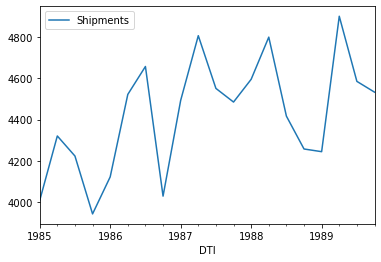

In [14]:
df.plot()

## Find the basic measures of descriptive statistics for this time series across quarters of different years.

In [15]:
df.describe()

,Shipments
count,20.000000
mean,4424.850000
std,274.089358
min,3944.000000
25%,4239.750000
50%,4489.000000
75%,4587.500000
max,4900.000000


##  Ploting the Time series along with the mean and median of the Time series in the graph to get an understanding of the fluctuation of the data from these two measures of central tendency.

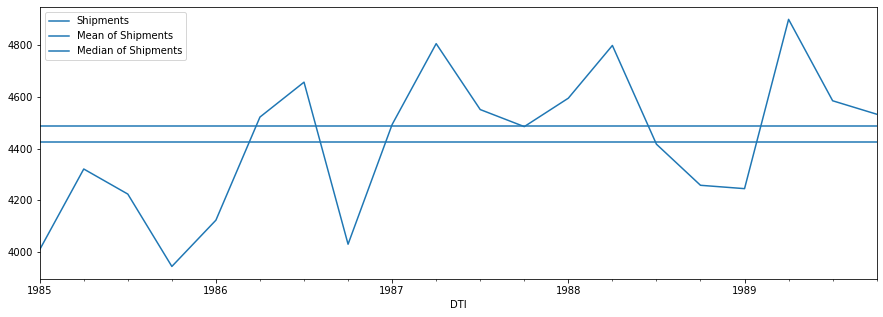

In [92]:
df.plot(figsize=(15,5))
plt.axhline(df.mean()[0],label=('Mean of Shipments'))
plt.axhline(df.median()[0],label=('Median of Shipments'))
plt.legend()

##  Ploting a quarterly comparison of the shipments using a barplot.

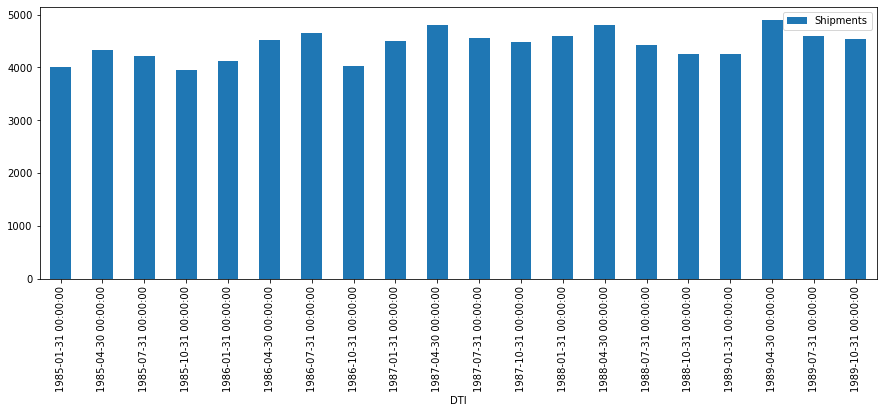

In [58]:
df.plot(kind='bar',figsize=(15,5))
plt.show()

##  Ploting the year on year quarterly comparison of the shipments.

<AxesSubplot:xlabel='Year'>

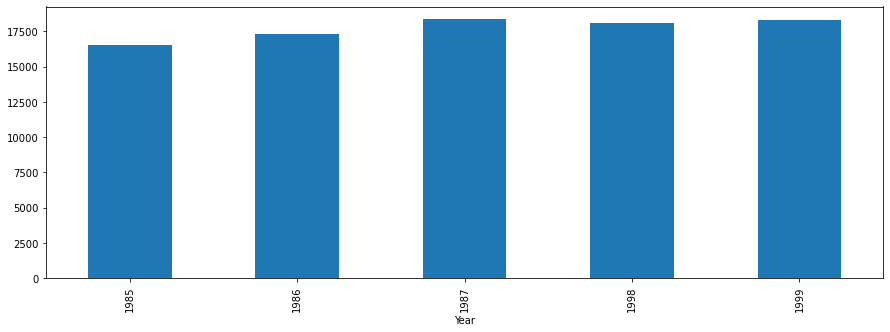

In [86]:
df.groupby('Year')['Shipments'].sum().plot(kind='bar',figsize=(15,5))

##  Ploting the distribution plot for quarterly comparison of the shipments.

<AxesSubplot:xlabel='Quarter', ylabel='Shipments'>

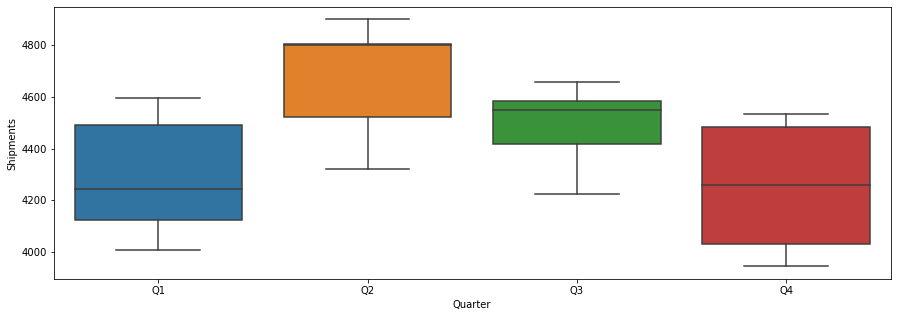

In [101]:
plt.figure(figsize=(15,5))
sns.boxplot(data = df, x='Quarter', y ='Shipments')

##  Decomposing the data and check the trend, seasonality and the irregular/residual/error component.

In [105]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_add_decompose = seasonal_decompose(df['Shipments'],model='additive')

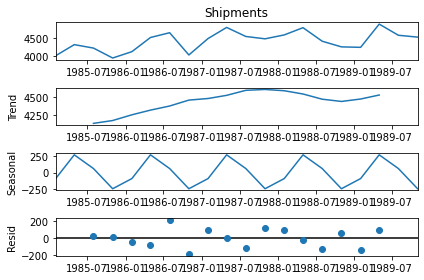

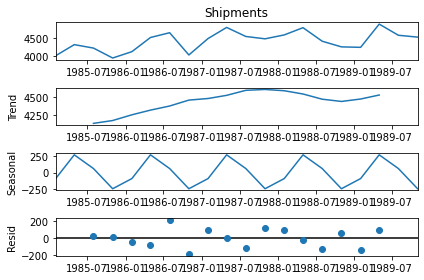

In [108]:
df_add_decompose.plot()

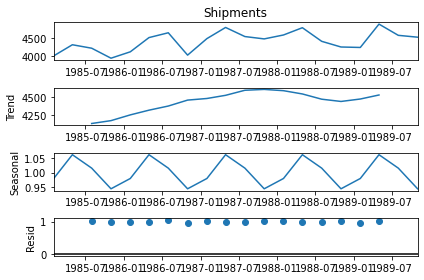

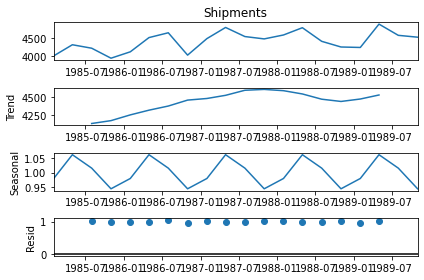

In [110]:
df_add_decompose = seasonal_decompose(df['Shipments'],model='multiplicative')
df_add_decompose.plot()